In [ ]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 2.9 MB/s eta 0:00:00


✈ SECOND

---
# **Import needed packages**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

✈  THIRD

---
# **generate read-depth data**



In [ ]:
np.random.seed(42)

# Normal region: ~30 reads
normal_reads = np.random.poisson(30, size=400)

# CNV region (duplication): ~60 reads
cnv_reads = np.random.poisson(60, size=100)

# Deletion region: ~10 reads (lower read depth)
deletion_reads = np.random.poisson(10, size=100)

# Normal region again: ~30 reads
normal_reads2 = np.random.poisson(30, size=500)

cnv_reads2 = np.random.poisson(60, size=20)

# Combine to make one genome (normal -> deletion -> CNV -> normal)
read_depth = np.concatenate([normal_reads, deletion_reads, cnv_reads, normal_reads2,cnv_reads2])

✈ FOURTH

---
# **READ-DEPTH data before applying algorithm**



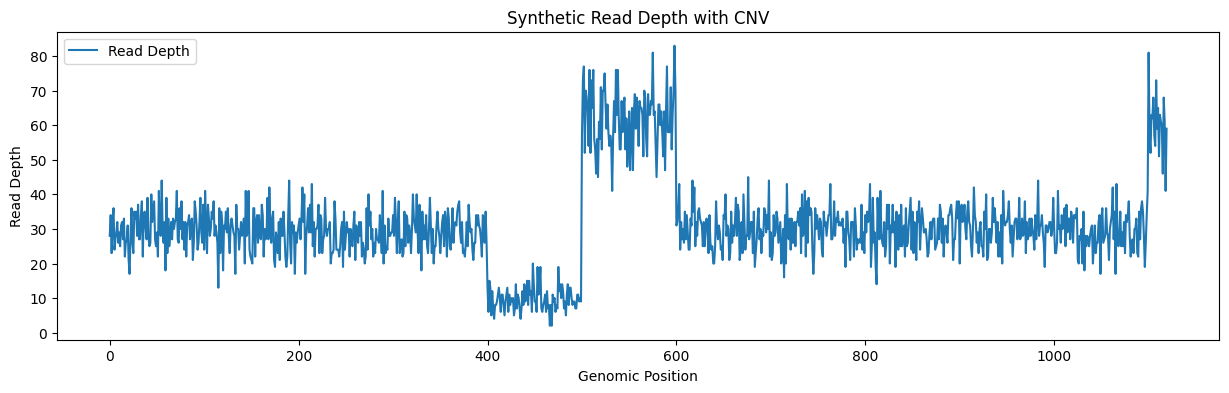

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(read_depth, label="Read Depth")
plt.title("Synthetic Read Depth with CNV")
plt.xlabel("Genomic Position")
plt.ylabel("Read Depth")
plt.legend()
plt.show()

✈ FIFTH

---
# **building HMM algorithm**



In [ ]:
# reshaping data for hmm : 2d shape
read_depth = read_depth.reshape(-1, 1) #-1 :for rows , 1 for columns (features : read depth )

# define the model  with 3 states: normal and CNV(dupliaction and deletion) , and check the reliability of the features to each other
model = hmm.GaussianHMM(n_components=5, covariance_type="full", n_iter=100, random_state=42)

# apply the algorithm generated on the data we have
model.fit(read_depth)

# predict the hidden states( deletion , duplication , normal)
hidden_states = model.predict(read_depth)

✈ SIXTH

---
# **Display the detected CNV Using HMM algorithm**



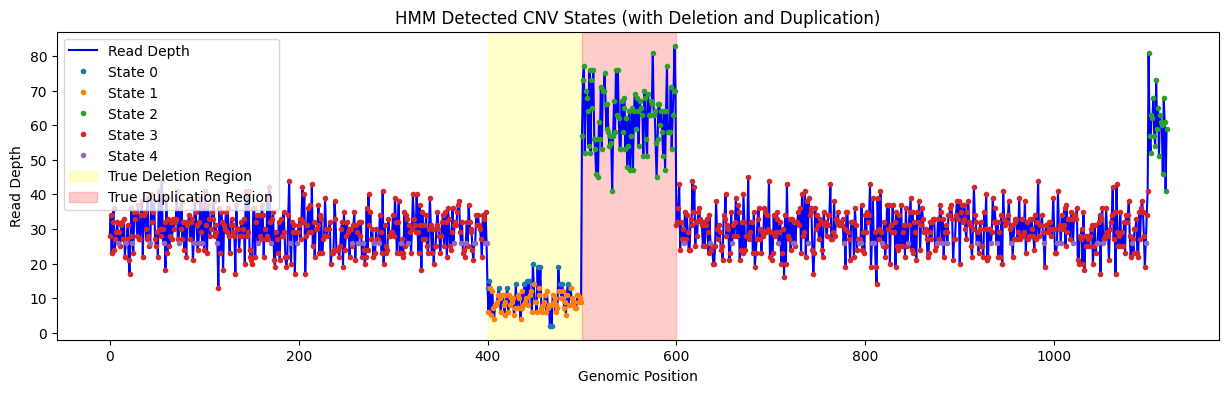

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(read_depth, label="Read Depth", color='blue')
# loop help visualize awhere the model think the cnv regions are located
for state in np.unique(hidden_states):
    idx = hidden_states == state
    plt.plot(np.where(idx)[0], read_depth[idx], '.', label=f"State {state}")
#highlighter
plt.axvspan(400, 500, color='yellow', alpha=0.2, label="True Deletion Region")
#highlighter
plt.axvspan(500, 600, color='red', alpha=0.2, label="True Duplication Region")
plt.title("HMM Detected CNV States (with Deletion and Duplication)")
plt.xlabel("Genomic Position")
plt.ylabel("Read Depth")
plt.legend()
plt.show()